# Airbnb Regression

In [27]:
# import the libraries

%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

__________________
# Load Data

In [28]:
df_airbnb = pd.read_csv('data/train.csv')

In [29]:
print(df_airbnb.columns)
df_airbnb.head()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.81,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.50,Real Bed,strict,True,...,41.85,-87.68,Pilsen Arts Community Custom Home,Pilsen,17,97.00,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.00,1.00
1,4765892,4.94,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.00,Real Bed,strict,True,...,34.07,-118.25,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.00,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.00,1.00
2,21169968,4.94,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.00,Real Bed,moderate,True,...,40.70,-73.92,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.00,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.00,3.00
3,7939196,4.87,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.00,Real Bed,strict,True,...,40.74,-73.99,Grande Super Large APT !!!,Flatiron District,12,82.00,NaN,10010,1.00,3.00
4,18161036,3.66,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.00,Real Bed,flexible,True,...,34.05,-117.73,Private Cozy and Clean Rooms in Pomona,NaN,2,100.00,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.00,1.00


____________________
# Overview

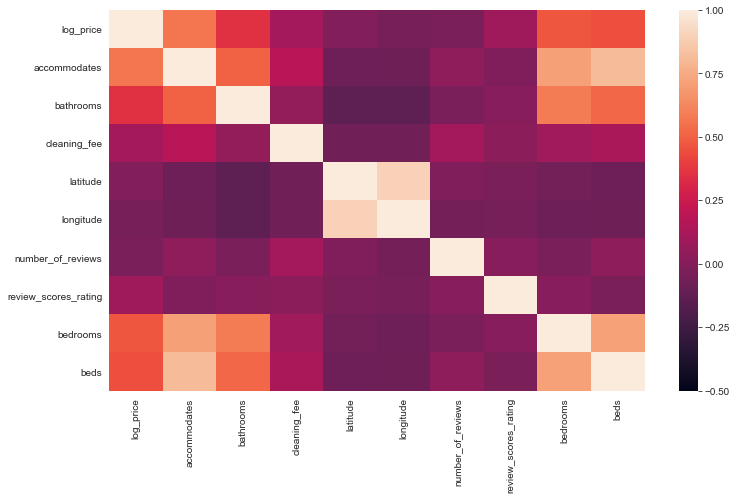

,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
longitude,-0.05,-0.08,-0.13,-0.07,0.90,1.00,-0.05,-0.05,-0.08,-0.08
number_of_reviews,-0.03,0.04,-0.04,0.11,-0.02,-0.05,1.00,0.02,-0.03,0.03
latitude,-0.00,-0.08,-0.13,-0.06,1.00,0.90,-0.02,-0.03,-0.06,-0.08
review_scores_rating,0.09,-0.02,0.01,0.03,-0.03,-0.05,0.02,1.00,0.01,-0.03
cleaning_fee,0.11,0.18,0.05,1.00,-0.06,-0.07,0.11,0.03,0.10,0.13
bathrooms,0.35,0.50,1.00,0.05,-0.13,-0.13,-0.04,0.01,0.59,0.52
beds,0.44,0.81,0.52,0.13,-0.08,-0.08,0.03,-0.03,0.71,1.00
bedrooms,0.47,0.71,0.59,0.10,-0.06,-0.08,-0.03,0.01,1.00,0.71
accommodates,0.57,1.00,0.50,0.18,-0.08,-0.08,0.04,-0.02,0.71,0.81
log_price,1.00,0.57,0.35,0.11,-0.00,-0.05,-0.03,0.09,0.47,0.44


In [30]:
corr_matrix = df_airbnb.iloc[:,1:].corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, vmin=-0.5)
plt.show()
corr_matrix.sort_values(by='log_price')

_______________
# Data Cleaning

## Change Format

In [31]:
# True and False Columns

df_airbnb=df_airbnb.replace(to_replace='t', value=True)
df_airbnb=df_airbnb.replace(to_replace='f', value=False)

df_airbnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.81,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.50,Real Bed,strict,True,...,41.85,-87.68,Pilsen Arts Community Custom Home,Pilsen,17,97.00,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.00,1.00
1,4765892,4.94,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.00,Real Bed,strict,True,...,34.07,-118.25,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.00,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.00,1.00
2,21169968,4.94,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.00,Real Bed,moderate,True,...,40.70,-73.92,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.00,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.00,3.00
3,7939196,4.87,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.00,Real Bed,strict,True,...,40.74,-73.99,Grande Super Large APT !!!,Flatiron District,12,82.00,NaN,10010,1.00,3.00
4,18161036,3.66,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.00,Real Bed,flexible,True,...,34.05,-117.73,Private Cozy and Clean Rooms in Pomona,NaN,2,100.00,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.00,1.00


In [32]:
# Date Columns

import time
import datetime

def format_date(date_string):

    if pd.isnull(date_string):
        return np.nan
    
    if type(date_string) != str:
        return date_string
    
    date_timestamp = time.mktime(datetime.datetime.strptime(date_string, "%m/%d/%Y").timetuple())
    return date_timestamp

In [33]:
df_airbnb['first_review'] = df_airbnb['first_review'].apply(format_date)
df_airbnb['last_review'] = df_airbnb['last_review'].apply(format_date)
df_airbnb['host_since'] = df_airbnb['host_since'].apply(format_date)

df_airbnb[['first_review','last_review', 'host_since']]

,first_review,last_review,host_since
0,1432526400.00,1483246800.00,1432094400.00
1,1447045200.00,1447563600.00,1441684800.00
2,1494820800.00,1506312000.00,1494043200.00
3,1352696400.00,1501300800.00,1233896400.00
4,1487307600.00,1490414400.00,1445313600.00
5,1463630400.00,1506052800.00,1459224000.00
6,nan,nan,1473998400.00
7,1471233600.00,1490932800.00,1418101200.00
8,1501905600.00,1503720000.00,1488862800.00
9,1501992000.00,1505707200.00,1409371200.00


In [34]:
# amenities
# Reference: https://www.kaggle.com/naamaavi/airbnb-price-prediction-regression-project

def clean_split_string(s):
    
    for c in ['"','{','}']:
        if (c in s):
            s = s.replace(c,'')
        
    for c in ['/',':',' ','-','.','&',')','(','\'','/']:
        if (c in s):
            s = s.replace(c,'_')
     
    if (',' not in s):
        return [s] #single amenity as a list
    
    return s.split(',') #return list of amenities

In [35]:
df_airbnb['amenities'] = df_airbnb['amenities'].apply(clean_split_string)
df_airbnb[['id','log_price','amenities']].head()

,id,log_price,amenities
0,13662370,3.81,"[TV, Internet, Wireless_Internet, Air_conditio..."
1,4765892,4.94,"[TV, Internet, Wireless_Internet, Air_conditio..."
2,21169968,4.94,"[TV, Cable_TV, Wireless_Internet, Air_conditio..."
3,7939196,4.87,"[Cable_TV, Internet, Wireless_Internet, Air_co..."
4,18161036,3.66,"[Internet, Wireless_Internet, Air_conditioning..."


In [36]:
df_airbnb.at[165,'amenities'] #It's important to confirm that single value in a column is presented as a list

['Pets_allowed']

______________________
## Missing Values

In [37]:
df_airbnb.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   133
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10856
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12551
host_since                  127
instant_bookable              0
last_review               10826
latitude                      0
longitude                     0
name                          0
neighbourhood              4675
number_of_reviews             0
review_scores_rating      11450
thumbnail_url              5629
zipcode                     645
bedrooms                     63
beds                         85
dtype: int64

### 1. Review scores rating

In [38]:
df_airbnb[df_airbnb['review_scores_rating'].isnull()]['number_of_reviews'].value_counts()

0      10820
1        509
2         64
3         23
4          5
5          4
15         3
8          3
28         2
23         2
10         1
32         1
17         1
25         1
33         1
63         1
18         1
19         1
36         1
21         1
37         1
101        1
6          1
7          1
131        1
Name: number_of_reviews, dtype: int64

#### Most of the missing values are because there aren't any reviews to calculate the rate from.

In [39]:
# Group by Highest Correlation Column

reviews_mean_rsr = df_airbnb.groupby('number_of_reviews')['review_scores_rating'].mean()
reviews_mean_rsr

number_of_reviews
0        nan
1      93.40
2      93.57
3      93.38
4      94.12
5      94.02
6      94.26
7      94.26
8      94.44
9      94.67
10     94.34
11     94.59
12     94.56
13     93.96
14     94.34
15     94.41
16     94.11
17     94.20
18     94.35
19     94.47
20     94.41
21     93.99
22     94.55
23     93.87
24     93.85
25     94.62
26     94.80
27     94.08
28     94.08
29     94.21
       ...  
349    97.00
351    91.33
353    89.00
354    92.50
356    91.50
358    98.00
366    88.00
367    94.50
370    97.00
374    95.00
378    93.00
379    96.50
382    98.00
384    96.00
385   100.00
388    95.00
389    96.00
391    93.00
394    96.00
400    95.00
423    95.00
449    97.00
451    94.00
453    98.00
465    89.00
469    96.00
525    98.00
530    99.00
542    99.00
605    97.00
Name: review_scores_rating, Length: 348, dtype: float64

In [40]:
# Fill the missing values

for idx in df_airbnb.index[df_airbnb['review_scores_rating'].isnull()]:
    n_reviews = df_airbnb.loc[idx,'review_scores_rating']
    
    if n_reviews == 0:
        df_airbnb.at[idx,'review_scores_rating'] = 0
        
    elif n_reviews > 0:
        df_airbnb.at[idx,'review_scores_rating'] = reviews_mean_rsr.iloc[int(n_reviews)]
        
    else: #If it's null
        df_airbnb.at[idx,'review_scores_rating'] = df_airbnb['review_scores_rating'].mean()

### 2. Bedrooms

In [41]:
#Bedrooms

print(df_airbnb['bedrooms'].corr(df_airbnb['beds']))
print(df_airbnb['bedrooms'].corr(df_airbnb['accommodates']))

0.7135956188054617
0.7090195281599462


#### Because of the high correlatione, we can use acommodates insted of bedrooms in prediction phase. But we still need to deal with missing values in `bedrooms` to replace the nulls in the `bathrooms` column.

In [42]:
# Group by Highest Correlation Column

acc_med_bedrooms = df_airbnb.groupby('accommodates', sort=False)['bedrooms'].median()
acc_med_bedrooms

accommodates
2    1.00
5    2.00
6    2.00
1    1.00
3    1.00
4    1.00
8    3.00
14   5.00
9    3.00
7    3.00
16   4.00
10   4.00
12   4.00
15   4.00
11   4.00
13   4.00
Name: bedrooms, dtype: float64

In [43]:
for idx in df_airbnb.index[df_airbnb['bedrooms'].isnull()]:
    n_acc = df_airbnb.loc[idx,'accommodates']
    if n_acc > 0:
        df_airbnb.at[idx,'bedrooms'] = acc_med_bedrooms.iloc[int(n_acc)]
        
    else:
        df_airbnb.at[idx,'bedrooms'] = df_airbnb['bedrooms'].median()
        
df_airbnb['bedrooms'].isnull().sum()

0

### 3. Bathrooms

In [44]:
#Bathrooms
import math

print("Bathrooms x bedrooms = ", df_airbnb['bathrooms'].corr(df_airbnb['bedrooms']).round(3))
print("Bathrooms x accommodates = ", df_airbnb['bathrooms'].corr(df_airbnb['accommodates']).round(3))

Bathrooms x bedrooms =  0.588
Bathrooms x accommodates =  0.505


In [45]:
bedrooms_med_baths = df_airbnb.groupby('bedrooms', sort=False)['bathrooms'].median()
print(bedrooms_med_baths)

bedrooms
1.00    1.00
2.00    1.00
4.00    2.50
0.00    1.00
3.00    2.00
5.00    3.50
6.00    4.00
9.00    4.00
8.00    4.50
7.00    4.50
10.00   6.00
Name: bathrooms, dtype: float64


In [46]:
for idx in df_airbnb.index[df_airbnb['bathrooms'].isnull()]:
    n_bedrms = df_airbnb.loc[idx,'bedrooms']
    
    #if(n_bedrms > 0): #replace by the median number of bathrooms
    df_airbnb.at[idx,'bathrooms'] = bedrooms_med_baths.iloc[int(n_bedrms)]
        
    #else: #replace by the median bathroom
    #    df_airbnb.at[idx,'bathrooms'] = df_airbnb['bathrooms'].median()

df_airbnb['bathrooms'].isnull().sum()

0

_________________________________
## Feature Engineering

In [130]:
# Amenities:

def get_amenities(df_airbnb):
    
    unique_amenities = []

    for idx, a_list in enumerate(df_airbnb['amenities']):
        
        for a in a_list:
            if (a not in df_airbnb.columns):
                unique_amenities += [a]
                df_airbnb[a] = 0
            
            df_airbnb.at[idx, a] = 1
            
    return unique_amenities

In [48]:
unique_amenities = get_amenities(df_airbnb)
print(len(unique_amenities))
unique_amenities

126


['TV',
 'Internet',
 'Wireless_Internet',
 'Air_conditioning',
 'Kitchen',
 'Gym',
 'Breakfast',
 'Indoor_fireplace',
 'Heating',
 'Family_kid_friendly',
 'Suitable_for_events',
 'Washer',
 'Dryer',
 'Smoke_detector',
 'Carbon_monoxide_detector',
 'First_aid_kit',
 'Safety_card',
 'Fire_extinguisher',
 'Essentials',
 'Cable_TV',
 'Pets_allowed',
 'Shampoo',
 'Lock_on_bedroom_door',
 'Hangers',
 'Hair_dryer',
 'Iron',
 'Laptop_friendly_workspace',
 'translation_missing__en_hosting_amenity_50',
 'Self_Check_In',
 'Lockbox',
 'Hot_water',
 'Bed_linens',
 'Extra_pillows_and_blankets',
 'Elevator',
 'Buzzer_wireless_intercom',
 'Free_parking_on_premises',
 'Hot_tub',
 '24_hour_check_in',
 'Bathtub',
 'Pool',
 'Doorman',
 'Refrigerator',
 'Oven',
 'Stove',
 'Long_term_stays_allowed',
 'translation_missing__en_hosting_amenity_49',
 'Private_entrance',
 'Private_living_room',
 'Pets_live_on_this_property',
 'High_chair',
 'Babysitter_recommendations',
 'Room_darkening_shades',
 'Microwave',
 '

In [ ]:
# property_type

df_airbnb['property_type'].unique()

In [ ]:
def get_dum(df_airbnb, df_ts):
    
    #C = np.where(df_airbnb['property_type'].unique() in df_ts['property_type'].unique(), A, B)
    prop_to_remove=[]
    
    for prop in df_airbnb['property_type']:
        if ~(prop in df_ts['property_type'].unique()):
            prop_to_remove +=[prop].index
            
    categorical=['room_type','bed_type','cancellation_policy', 'city']            
    
    df_dummies=pd.get_dummies(df_airbnb[categorical])
    new_df = pd.concat([df_airbnb, df_dummies], axis=1)
    
    return new_df,df_dummies

In [115]:
categorical=['room_type','cancellation_policy', 'city'] # + property_type

df_dummies=pd.get_dummies(df_airbnb[categorical])

new_df = pd.concat([df_airbnb, df_dummies], axis=1)

In [116]:
print("New DF Columns= ",new_df.shape[1])
print(new_df.columns)

New DF Columns=  169
Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee',
       ...
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'city_Boston', 'city_Chicago',
       'city_DC', 'city_LA', 'city_NYC', 'city_SF'],
      dtype='object', length=169)


_____________________________________

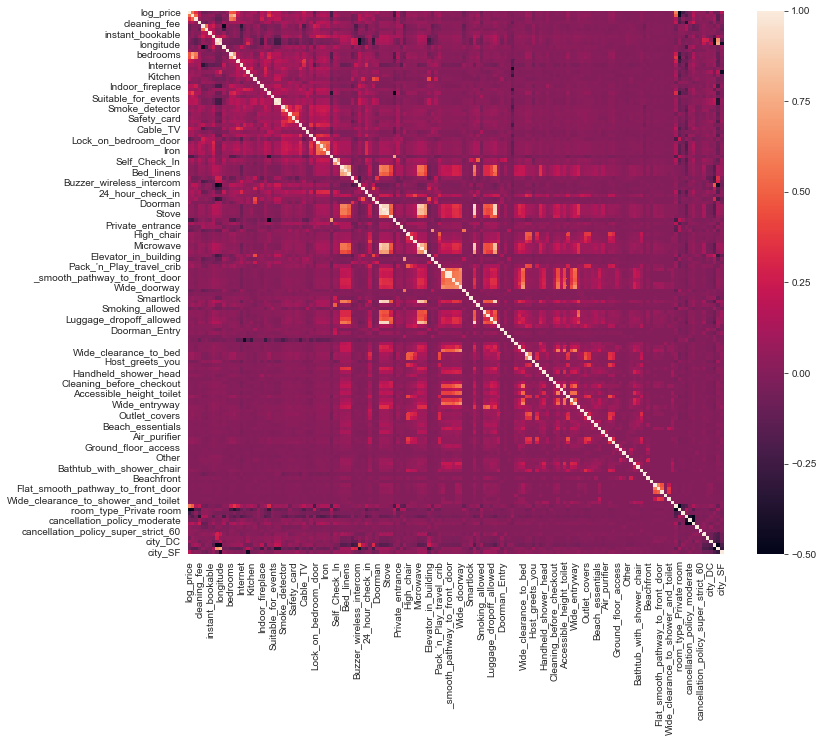

,log_price,accommodates,bathrooms,cleaning_fee,first_review,host_since,instant_bookable,last_review,latitude,longitude,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
room_type_Private room,-0.53,-0.45,-0.15,-0.18,0.04,0.06,0.02,0.01,0.06,0.06,...,0.01,-0.15,-0.03,-0.01,-0.02,-0.02,-0.07,-0.05,0.11,-0.01
translation_missing__en_hosting_amenity_49,-0.23,-0.26,-0.09,0.00,0.04,-0.01,-0.03,0.11,-0.00,0.00,...,0.03,-0.00,-0.02,-0.01,-0.02,0.00,-0.02,0.01,0.02,-0.01
room_type_Shared room,-0.22,-0.09,0.03,-0.09,0.03,0.05,0.02,-0.01,-0.05,-0.03,...,-0.03,-0.02,-0.01,-0.00,-0.02,0.00,-0.00,0.05,-0.02,-0.03
translation_missing__en_hosting_amenity_50,-0.21,-0.21,-0.09,0.03,0.05,0.01,-0.01,0.13,-0.01,-0.00,...,0.05,0.00,-0.02,-0.01,-0.04,0.02,-0.01,0.01,0.02,-0.02
Lock_on_bedroom_door,-0.13,-0.07,-0.00,-0.02,0.27,0.17,0.13,0.14,0.03,0.03,...,0.01,-0.05,-0.02,-0.01,-0.00,0.01,0.02,-0.03,0.02,-0.02
Pets_live_on_this_property,-0.10,-0.08,-0.03,0.01,-0.11,-0.08,-0.06,-0.04,-0.09,-0.09,...,0.06,-0.04,-0.01,-0.00,-0.03,0.03,-0.01,0.08,-0.08,0.02
cancellation_policy_flexible,-0.10,-0.17,-0.06,-0.36,0.15,0.14,0.00,-0.14,-0.01,0.01,...,-0.39,-0.58,-0.03,-0.01,-0.03,-0.02,0.04,-0.00,0.01,-0.01
first_review,-0.08,0.00,-0.00,-0.03,1.00,0.54,0.19,0.26,0.06,0.07,...,-0.01,-0.11,-0.07,0.00,0.05,0.01,-0.00,-0.04,0.04,-0.05
host_since,-0.08,0.01,0.01,-0.10,0.54,1.00,0.19,0.14,-0.01,0.02,...,-0.04,-0.09,-0.08,0.01,0.04,0.02,0.00,0.04,-0.01,-0.09
city_NYC,-0.08,-0.14,-0.16,-0.06,0.04,-0.01,-0.03,0.14,0.65,0.75,...,-0.03,0.02,-0.03,-0.01,-0.20,-0.20,-0.25,-0.58,1.00,-0.27


In [117]:
corr_matrix = new_df.iloc[:,1:].corr()

plt.figure(figsize=(12,10))
sns.heatmap(new_df.iloc[:,1:].corr(), vmin=-0.5)
plt.show()
corr_matrix.sort_values(by='log_price')

______________________________
## Train the Models

In [118]:
X_columns = ['bathrooms', 'accommodates','number_of_reviews'] + list(df_dummies.columns)+unique_amenities
y_column = ['log_price']

# handle missing values
df_train = new_df[X_columns + y_column]
print(df_train.shape)

(51000, 144)


In [119]:
# Split

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40800, 143)
y_train (40800, 1)
X_test (10200, 143)
y_test (10200, 1)


In [120]:
def cross_val_pred(model, x,y):
    y_pred = cross_val_predict(model, x, y, cv = 7)
    return y_pred

In [121]:
# Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

#lr_pred = cross_val_pred(lr_model, X_test, y_test)

In [122]:
# Random Forest

rf_model = RandomForestRegressor(20)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

#rf_pred = cross_val_pred(rf_model, X_test, y_test)

C:\Users\A-Sha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [123]:
# Gradient Boosting

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)


C:\Users\A-Sha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
# Lasso 

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)


_________________
## Models Evaluations

RMSE 0.4715721502035279


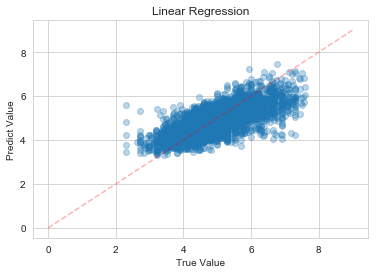

In [124]:
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print('RMSE', rmse)
plt.scatter(y_test, lr_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

RMSE 0.4534005757553903


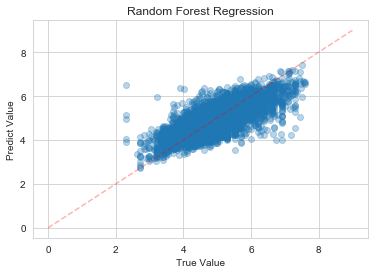

In [125]:
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print('RMSE', rmse)
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Random Forest Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

RMSE 0.4459077665583935


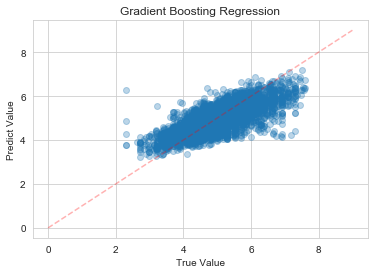

In [126]:
rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
print('RMSE', rmse)
plt.scatter(y_test, gb_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Gradient Boosting Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

RMSE 0.7217491889449688


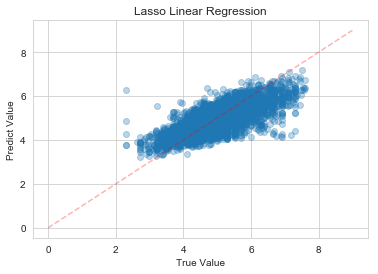

In [128]:
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print('RMSE', rmse)
plt.scatter(y_test, gb_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Lasso Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

In [100]:
# KNN

kn_model = KNeighborsRegressor(10)
kn_model.fit(X_train, y_train)
kn_pred = kn_model.predict(X_test)

#kn_pred = cross_val_pred(kn_model, X_test, y_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, kn_pred))
print('RMSE', rmse)
plt.scatter(y_test, kn_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('K-Nearest Neighbour Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()